# 支持向量機SVM - rbf & Poly

In [212]:
'''■■■■■■■■■■隨機常態分佈(均勻)■■■■■■■■■■'''
def randomuniform(mu,sigma,size):
    # import the required libraries 
    import random 
    import matplotlib.pyplot as plt 

    
    # store the random numbers in a list 
    nums = []        
    for i in range(size): 
        temp = random.uniform(mu, sigma) 
        nums.append(temp) 
    
    #plotting a graph 
    #plt.hist(nums, bins = 200) 
    #plt.show()
    return(nums)
'''■■■■■■■■■■隨機常態分佈(高斯分布)■■■■■■■■■■'''
def randomgauss(mu,sigma,size):
    # import the required libraries 
    import random 
    import matplotlib.pyplot as plt 
        
    # store the random numbers in a list 
    nums = []        
    for i in range(size): 
        temp = random.gauss(mu, sigma) 
        nums.append(temp) 
    
    # plotting a graph 
    #plt.hist(nums, bins = 200) 
    #plt.show()
    return(nums)
'''■■■■■■■■■■隨機圓心外擴常態分佈(r常態角度均勻隨機分布)■■■■■■■■■■'''
def plot_random_points(center, radius, num_points):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import random

    df = pd.DataFrame([])
    theta = np.random.uniform(0, 2*np.pi, num_points)
    nums = []  
    #for i in range(num_points*2):
    while len(nums)<num_points:
        temp = random.gauss(0, radius)
        if temp<=0:
            nums.append(temp)
    #r = np.sqrt(np.random.uniform(0, radius**2, num_points))
    x = center[0] + nums * np.cos(theta)
    y = center[1] + nums * np.sin(theta)
    #plt.scatter(x, y)
    #plt.show()
    df[0]=x
    df[1]=y
    return [df]

#plot_random_points([0,0], 1, 100)

In [213]:
'''■■■■■■■■■■找出欲分析的欄位名稱■■■■■■■■■■'''
def col_para(data):
    cname=data.columns #總共欄位名稱
    print('表格中具備參數：',cname[1:])
    a = input('請輸入欲分析的參數：')
    alist=([a])
    while a!=('n') and a!=('N'):
        a = input('請輸入欲分析的參數，不需分析請輸入n：')
        alist.append(a)
    alist=alist[:-1] #n那筆不用計算
    new_list =[] #找到接近的參數欄位
    for i in range(len(alist)):
        py_list = cname
        for x in py_list: 
            if alist[i] in x:
                new_list.append(x)
    para = list(set(new_list)) #刪除重複參數
    return(para)

In [214]:
'''■■■■■■■■■■建立目錄■■■■■■■■■■'''

def mkdir(title,path):
    from datetime import datetime
    
    dt = datetime.now().strftime('%Y%m%d')
    #判斷目錄是否存在
    title = ('\\'+title+'_pyplot_'+dt)
     #當前目錄
    path=path+title
    folder = os.path.exists(path)

    #判斷結果
    if not folder:
        #如果不存在，則建立新目錄
        os.makedirs(path)
    return path

In [215]:
'''■■■■■■■■■■將超平面座標轉換回原始座標■■■■■■■■■■'''
def TransftoOrig(data_orig,data_trans):
    from sklearn.preprocessing import StandardScaler
    scaler =  StandardScaler()
    scaler.fit(data_orig)
    mean = scaler.mean_
    std = scaler.scale_
    original_data = (data_trans * std) + mean
    return original_data
    

In [216]:
from sklearn.datasets import load_breast_cancer
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os

In [217]:
#import chardet
#with open('MW80HF#5-2.xlsx', 'rb') as f:
#    result = chardet.detect(f.read()) #確認編碼方式
#data = pd.read_csv('MW80HF#5-2.xlsx', encoding=result['encoding'])

# 讀取資料

In [220]:
# MW80HF data 清洗資料

data = pd.read_excel('MW80HF-life#1.xlsm')

cname=data.columns #總共欄位名稱
print('表格中具備參數：',cname[1:])
target = input('請輸入欲分析的目標結果：')

表格中具備參數： Index(['H2', 'Cavity', 'W2', '1KK-life', 'alignment'], dtype='object')
請輸入欲分析的目標結果：alignment


In [221]:

nowdir = os.getcwd()
path1 = mkdir('Decision Boundary',nowdir)
path2 = mkdir(target,path1)

In [222]:
#data[target].values

In [223]:

dx_orig = data.iloc[:, [1,2]].values #轉成numpy陣列
dy = data[target].values
#dx = PCA(n_components=2).fit_transform(dx)
dx = StandardScaler().fit_transform(dx_orig)

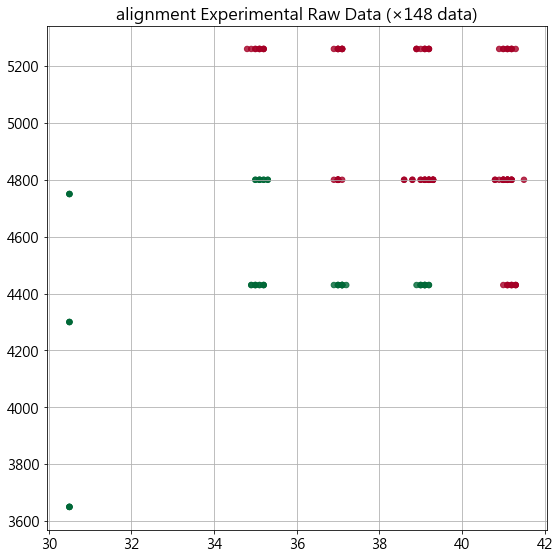

In [224]:
'''■■■■■■■■■■Experimental Raw Data■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'Experimental Raw Data (×{len(dy)} data)')
ax=plt.scatter(data['H2'],data['Cavity'],c=dy, cmap='RdYlGn_r', s=30, alpha=0.8)

plt.grid(True)
plt.tight_layout() #減少圖表的白邊
#plt.legend()
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_Raw Data_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

# 拆分模型

In [225]:
dx_train, dx_test, dy_train, dy_test = \
          train_test_split(dx, dy, test_size=0.25, random_state=66)

# 增強資料

In [229]:

'''■■■■■■把train的資料集擴大r圓心■■■■■■'''
expandlevel = float(input('請輸入增強資料點的擴散程度，擴散範圍程度0~1：'))
#expandlevel=0 #擴散範圍程度0~1
expandnum=10 #擴充數量
distribR = expandlevel/2 #分布的範圍半徑r
#distribCavity = expandlevel/2 #分布的範圍半徑r
#distribH2 = (37-35)/2 #分布的範圍半徑r
#distribCavity = (4800-4430)/2 #分布的範圍半徑r


#先把train_data抓回來
train_orig = pd.DataFrame(dx_train,columns=['H2','Cavity'])
train_orig[target]=dy_train

list_1=train_orig['H2'].tolist()
list_2=train_orig['Cavity'].tolist()
list_3=train_orig[target].tolist()
if expandlevel!=0: #擴散程度0就乾脆不用增強資料
    for I in range(len(dx_train)):
        Df=plot_random_points([dx_train[I][0],dx_train[I][1]],distribR,expandnum) #Df[0]才是以圓心隨機分布的data
        
        list_1 =list_1 + Df[0][0].tolist()
        
        list_2 = list_2 + Df[0][1].tolist()
        
        list_3 = list_3+[dy_train[I]]*expandnum
    
data2= pd.DataFrame({'H2':list_1,'Cavity':list_2,target:list_3}) #儲存延伸的常態分佈數據用
#data2

請輸入增強資料點的擴散程度，擴散範圍程度0~1：0.25


In [230]:
#dx_train

In [231]:
#'''■■■■■■把train的資料集擴大XY■■■■■■'''
#expandlevel = float(input('請輸入增強資料點的擴散程度，擴散範圍程度0~1：'))
##expandlevel=0 #擴散範圍程度0~1
#expandnum=10 #擴充數量
#distribH2 = expandlevel/2 #分布的範圍半徑r
#distribCavity = expandlevel/2 #分布的範圍半徑r
##distribH2 = (37-35)/2 #分布的範圍半徑r
##distribCavity = (4800-4430)/2 #分布的範圍半徑r
#
#
##先把train_data抓回來
#train_orig = pd.DataFrame(dx_train,columns=['H2','Cavity'])
#train_orig[target]=dy_train
#
#list_1=train_orig['H2'].tolist()
#list_2=train_orig['Cavity'].tolist()
#list_3=train_orig[target].tolist()
#if expandlevel!=0: #擴散程度0就乾脆不用增強資料
#    for I in range(len(dx_train)):
#        mu1 = dx_train[I][0]
#        list_1 = list_1 + randomgauss(mu1,distribH2*2/6,expandnum)
#        mu2 = dx_train[I][1]
#        list_2 = list_2 + randomgauss(mu2,distribCavity*2/6,expandnum)
#        
#        list_3 = list_3+[dy_train[I]]*expandnum
#    
#data2= pd.DataFrame({'H2':list_1,'Cavity':list_2,target:list_3}) #儲存延伸的常態分佈數據用
#

In [232]:
dx_train2 = data2.iloc[:, [0,1]].values #轉成numpy陣列
dy_train2 = data2.iloc[:, -1].values

C:\Users\Calla.Lin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Calla.Lin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


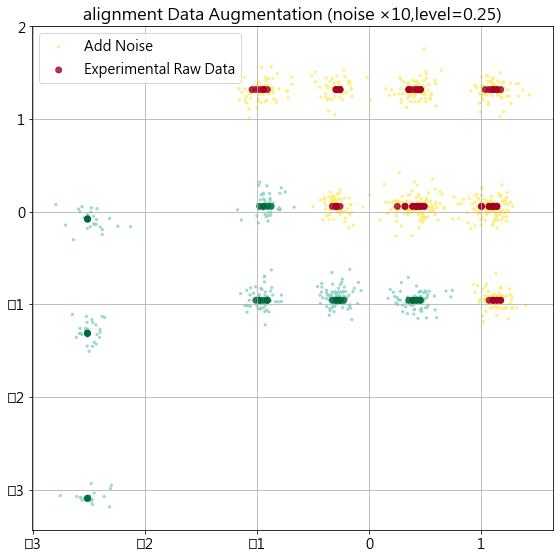

In [233]:
'''■■■■■■■■■■看方形資料增強的噪點效果(超平面上結果)■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'Data Augmentation (noise ×{expandnum},level={expandlevel})')
ax=plt.scatter(*dx_train2.T,c=dy_train2, cmap='Set3', s=5, alpha=0.8,label='Add Noise')
ax=plt.scatter(*dx_train.T,c=dy_train, cmap='RdYlGn_r', s=35, alpha=0.8,label='Experimental Raw Data')
plt.grid(True)
plt.tight_layout() #減少圖表的白邊

plt.legend(loc='upper left')
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_Train Data Plot_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
#sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

In [234]:
#將StandardScaler轉換後的數據再轉回原始data

original_data = TransftoOrig(dx_orig,dx_train)
original_data2 = TransftoOrig(dx_orig,dx_train2)

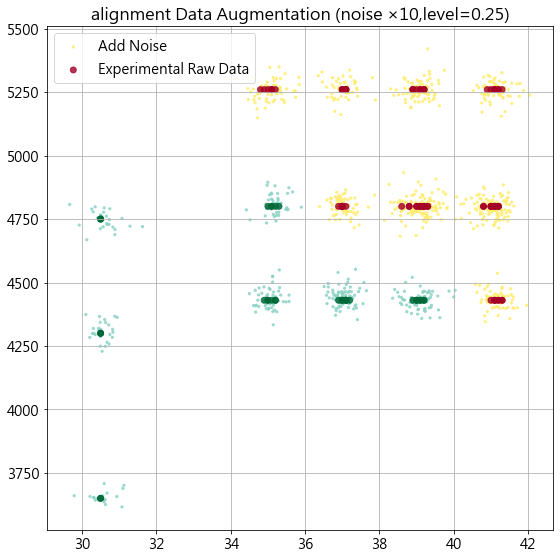

In [235]:
'''■■■■■■■■■■看資料增強的噪點效果■■■■■■■■■■'''

plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'Data Augmentation (noise ×{expandnum},level={expandlevel})')
ax=plt.scatter(*original_data2.T,c=dy_train2, cmap='Set3', s=5, alpha=0.8,label='Add Noise')
ax=plt.scatter(*original_data.T,c=dy_train, cmap='RdYlGn_r', s=35, alpha=0.8,label='Experimental Raw Data')
plt.grid(True)
plt.tight_layout() #減少圖表的白邊
plt.legend()
plt.legend(loc='upper left')
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_Train Data Plot_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

# 演算法選擇

In [236]:
'''■■■■■■■■■■訓練rbf SVM 並預測結果■■■■■■■■■■'''
kernel = input('請輸入欲分析線性或非線性模型，線性輸入linear，預設為非線性：')
gamma=0.06
C1=100
if kernel =='linear':
    model = SVC(kernel=kernel,C=C1,gamma=gamma)#C=0.05)
    model.fit(dx_train, dy_train)
else:
    kernel = 'rbf'  # 選擇 kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    model = SVC(kernel=kernel,C=C1,gamma=gamma)#C=0.05,gamma=敏感度)
    model.fit(dx_train2, dy_train2)

#'''■■■■■■■■■■訓練poly SVM 並預測結果■■■■■■■■■■'''
#kernel = 'poly'  # 選擇 kernel: 'linear', 'poly', 'rbf', 'sigmoid'
#model = SVC(kernel=kernel,degree=3,C=100,gamma=0.1)#C=0.05)
#model.fit(dx_train, dy_train)

請輸入欲分析線性或非線性模型，線性輸入linear，預設為非線性：


# 預測模型分數

In [237]:
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
#test_score

## 繪製超平面上的決策邊界

In [238]:

#DBcolor = input('請輸入決策邊界的顏色：')
DBcolor = 'blue'

C:\Users\Calla.Lin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Calla.Lin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


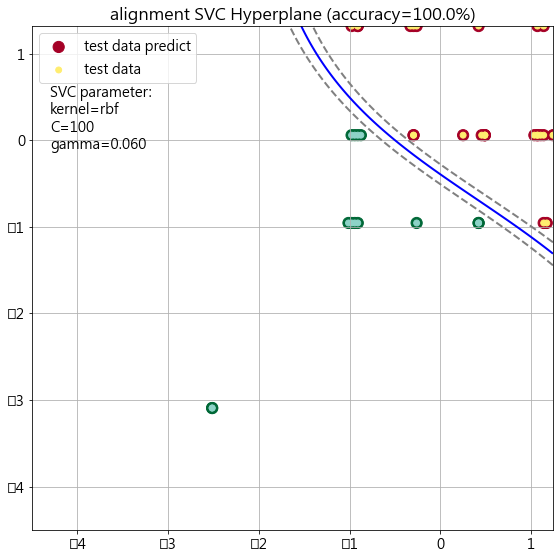

In [239]:
'''■■■■■■■■■■看學習後的決策邊界(超平面)■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'SVC Hyperplane (accuracy={test_score:.1f}%)')

#ax=plt.scatter(data2['H2'],data2['Cavity'],c=data2[target], cmap='Pastel2',s=10,label='train data')
ax=plt.scatter(*dx_test.T, c=predict, cmap='RdYlGn_r', s=125,label='test data predict') #預測的數據RdYlGn_r
ax=plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35,label='test data') #真實的數據spring_r、Set3
# 求出超平面與邊界
#xlim=[20,40]
#ylim=[3500,6000]
#x_min = xlim[0]
#x_max = xlim[1]
#y_min = ylim[0]
#y_max = ylim[1]
x_min = -4.5#np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = -4.5#np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])

#
#x1 = np.linspace(xlim[0],xlim[1], 100)
#x2 = np.linspace(ylim[0],ylim[1], 100)
#X1, X2 = np.meshgrid(x1, x2)
#y_pred = model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)


XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] #分成兩百格
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', DBcolor, 'grey'],
               #plt.contour(XX, YY, Z, colors=['darkgrey', 'blue', 'darkgrey'],
               linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
               levels=[-1, 0, 1])
plt.grid(True)
#plt.xlim([30,41.5])
#plt.ylim([3000, 5300])
#plt.xlim([34.5,41.5])
#plt.ylim([4400, 5300])
#plt.xlim([35,41])
#plt.ylim([4430, 5260])
#增加註解
plt.text(-4.3, 0.5, f'SVC parameter:')
plt.text(-4.3, 0.3, f'kernel='+kernel)
plt.text(-4.3, 0.1, f'C={C1:.0f}')
plt.text(-4.3, -0.1, f'gamma={gamma:.3f}')

plt.legend()
plt.legend(loc='upper left')
plt.tight_layout() #減少圖表的白邊
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_SVC Hyperplane_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

C:\Users\Calla.Lin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Calla.Lin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


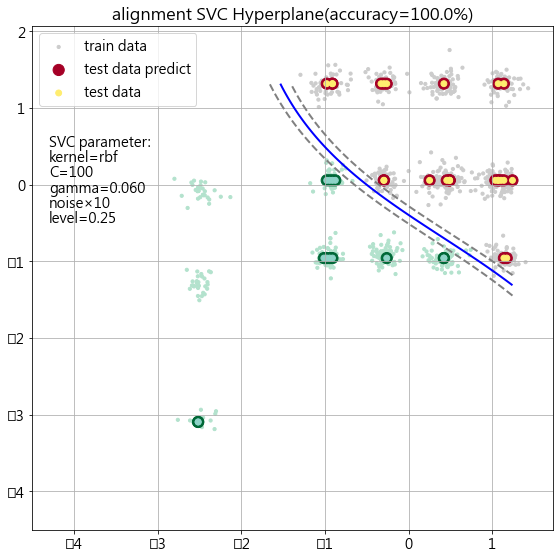

In [240]:
'''■■■■■■■■■■看學習後的決策邊界和訓練集(超平面)■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14 
plt.title(target+' '+f'SVC Hyperplane(accuracy={test_score:.1f}%)')

ax=plt.scatter(data2['H2'],data2['Cavity'],c=data2[target], cmap='Pastel2',s=10,label='train data') #訓練集的數據
ax=plt.scatter(*dx_test.T, c=predict, cmap='RdYlGn_r', s=125,label='test data predict') #預測的數據RdYlGn_r
ax=plt.scatter(*dx_test.T, c=dy_test, cmap='Set3', s=35,label='test data') #真實的數據spring_r、Set3
# 求出超平面與決策邊界(決策邊界抓到訓練集邊緣)
x_min = -4.5#np.amin(dx_test.T[0])
x_max = np.amax(dx_test.T[0])
y_min = -4.5#np.amin(dx_test.T[1])
y_max = np.amax(dx_test.T[1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] #分成兩百格
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

# 畫出超平面與邊界
plt.contour(XX, YY, Z, colors=['grey', 'blue', 'grey'],
               #plt.contour(XX, YY, Z, colors=['darkgrey', 'blue', 'darkgrey'],
               linestyles=['--', '-', '--'], linewidths=[2, 2, 2],
               levels=[-1, 0, 1])
plt.grid(True)
#plt.xlim([30,41.5])
#plt.ylim([3000, 5300])
#plt.xlim([34.5,41.5])
#plt.ylim([4400, 5300])
#plt.xlim([35,41])
#plt.ylim([4430, 5260])
#增加註解
plt.text(-4.3, 0.5, f'SVC parameter:')
plt.text(-4.3, 0.3, f'kernel='+kernel)
plt.text(-4.3, 0.1, f'C={C1:.0f}')
plt.text(-4.3, -0.1, f'gamma={gamma:.3f}')
plt.text(-4.3, -0.3, f'noise×{expandnum}')
plt.text(-4.3, -0.5, f'level={expandlevel}')


plt.legend()
plt.legend(loc='upper left')
plt.tight_layout() #減少圖表的白邊
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_SVC Hyperplane allplot_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

# 將訓練出的決策邊界data抓出來

In [241]:
#Z_T

In [242]:
'''■■■■■■判斷某數值是否介於range中■■■■■■'''
def is_in_range(x, start, end):
    return any(start <= x <= end for x in [x])
'''■■■■■■線性內插■■■■■■'''
def interp(x,y,x_new,kind):
    from scipy.interpolate import interp1d
    #x = [0, 1]
    #y = [4, 9]
    f = interp1d(x, y,kind=kind,bounds_error=False) #kind可以改為polynomial
    #x_new = [0.5, 0, 3.5]
    y_new = f(x_new)
    return y_new.tolist()


#x = [0, 1]
#y = [4, 9]
#x_new = 0.5
#kind='linear'
#interp(x,y,x_new,kind)


In [243]:
#將反應曲面的矩陣反轉
XX_T = pd.DataFrame(XX).T
YY_T = pd.DataFrame(YY).T
Z_T=pd.DataFrame(Z).T
#將反應曲面的矩陣正轉
XX_matrix = pd.DataFrame(XX)
YY_matrix = pd.DataFrame(YY)
Z_matrix=pd.DataFrame(Z)
#pd.set_option('display.max_rows', None)
#Z_T

In [244]:
c2_list=[-1,0,1] #想找尋的目標值

for J in range(len(c2_list)):
    c2 = c2_list[J]
    locals()['df_'+str(c2)]=pd.DataFrame([],columns=['H2(um)','Cavity(um)'])
    #直向線性內插
    for I in range(Z_T.shape[0]): #欄位
        for i in range(Z_T.shape[1]-1): #列數
            inornot1=is_in_range(c2,Z_T[I][i],Z_T[I][i+1])  #判斷是否若在範圍內
            inornot2=is_in_range(c2,Z_T[I][i+1],Z_T[I][i])  #判斷是否若在範圍內(曲線有可能斜率<0)
            inornot=(inornot1 or inornot2)
            if (inornot): #如果在線性範圍內就內插
                x = [Z_T[I][i],Z_T[I][i+1]]
                y = [XX_T[I][i],XX_T[I][i+1]]
                x_new = c2
                kind='linear'#線性內插
                getyou_X = interp(x,y,x_new,kind)
                x = [Z_T[I][i],Z_T[I][i+1]]
                y = [YY_T[I][i],YY_T[I][i+1]]
                x_new = c2
                kind='linear'
                getyou_Y = interp(x,y,x_new,kind)
                locals()['df_'+str(c2)]=locals()['df_'+str(c2)].append({'H2(um)':getyou_X,'Cavity(um)':getyou_Y},ignore_index=True)
    #橫向線性內插
    for I in range(Z_matrix.shape[0]): #欄位
        for i in range(Z_matrix.shape[1]-1): #列數
            inornot=is_in_range(c2,Z_matrix[I][i],Z_matrix[I][i+1])  #判斷是否若在範圍內 
            if (inornot): #如果在線性範圍內就內插
                x = [Z_matrix[I][i],Z_matrix[I][i+1]]
                y = [XX_matrix[I][i],XX_matrix[I][i+1]]
                x_new = c2
                kind='linear'#線性內插
                getyou_X = interp(x,y,x_new,kind)
                x = [Z_matrix[I][i],Z_matrix[I][i+1]]
                y = [YY_matrix[I][i],YY_matrix[I][i+1]]
                x_new = c2
                kind='linear'
                getyou_Y = interp(x,y,x_new,kind)
                locals()['df_'+str(c2)]=locals()['df_'+str(c2)].append({'H2(um)':getyou_X,'Cavity(um)':getyou_Y},ignore_index=True)

                
                
#locals()['df_'+str(c2)]

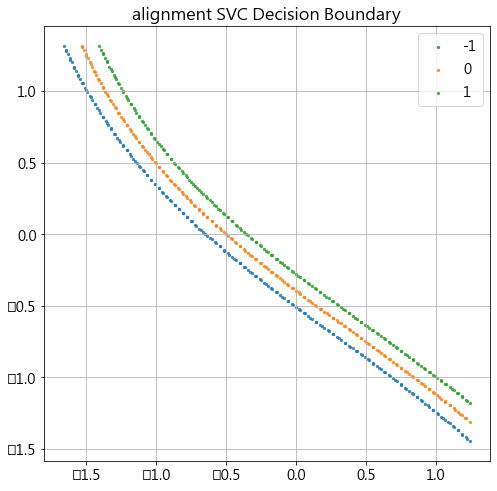

In [245]:
'''■■■■■■■■■■決策邊界data(超平面)■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'SVC Decision Boundary')

for J in range(len(c2_list)):
    c2 = c2_list[J]
    ax = plt.scatter(locals()['df_'+str(c2)]['H2(um)'],locals()['df_'+str(c2)]['Cavity(um)'], s=5, alpha=0.8,label=c2)
#plt.xlim([30,41.5])
#plt.ylim([3000, 5300])
plt.legend()
plt.grid(True)
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_Decision Boundary Plot_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
#sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

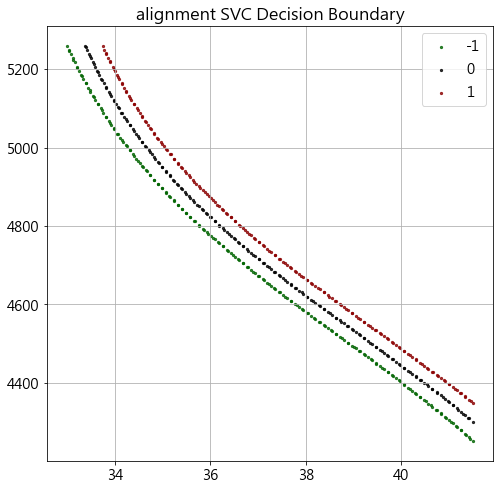

In [246]:
'''■■■■■■■■■■決策邊界data■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'SVC Decision Boundary')

colorlist=['darkgreen','black','darkred']
for J in range(len(c2_list)):
    c2 = c2_list[J]
    original_data = TransftoOrig(dx_orig,locals()['df_'+str(c2)]) #轉換回原始座標
    ax = plt.scatter(original_data['H2(um)'],original_data['Cavity(um)'], s=5, alpha=0.8,label=c2,color=colorlist[J])
#plt.xlim([30.5,40.5])
#plt.ylim([2500, 6000])
plt.legend()
plt.grid(True)
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_Decision Boundary Plot_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
#sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

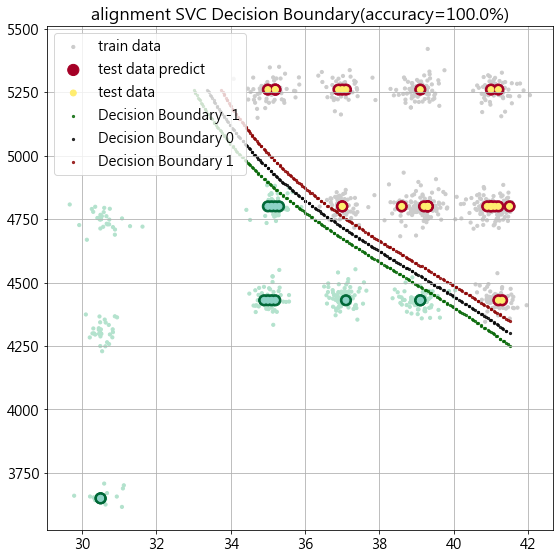

In [247]:
'''■■■■■■■■■■看學習後的決策邊界和訓練集■■■■■■■■■■'''
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 14
plt.title(target+' '+f'SVC Decision Boundary(accuracy={test_score:.1f}%)')

original_data=TransftoOrig(dx_orig,dx_train2) #轉換回原始座標
ax=plt.scatter(*original_data.T,c=data2[target], cmap='Pastel2',s=10,label='train data') #訓練集的數據
original_data2=TransftoOrig(dx_orig,dx_test) #轉換回原始座標
ax=plt.scatter(*original_data2.T, c=predict, cmap='RdYlGn_r', s=125,label='test data predict') #預測的數據RdYlGn_r
ax=plt.scatter(*original_data2.T, c=dy_test, cmap='Set3', s=35,label='test data') #真實的數據spring_r、Set3

# 畫出邊界
colorlist=['darkgreen','black','darkred']
for J in range(len(c2_list)):
    c2 = c2_list[J]
    locals()['oridata'+str(c2)] = TransftoOrig(dx_orig,locals()['df_'+str(c2)]) #轉換回原始座標
    ax = plt.scatter(locals()['oridata'+str(c2)]['H2(um)'],locals()['oridata'+str(c2)]['Cavity(um)'], s=5, alpha=0.8,label='Decision Boundary '+str(c2),color=colorlist[J])

plt.grid(True)

#plt.xlim([34.5,42])
#plt.ylim([4360, 5400])
plt.legend()
plt.legend(loc='upper left')
plt.tight_layout() #減少圖表的白邊
plt.show()

#匯出圖檔
dt = datetime.now().strftime('%Y%m%d')
tt = (target+'_Decision Boundary Plot_'+dt+'.jpg') #檔名
pathfig = path2+'\\'+tt
sfig = ax.get_figure()
sfig.savefig(pathfig,  orientation="landscape")
sfig.clear()

In [248]:
'''■■■■■■■■■■匯出Decision Boundary excel■■■■■■■■■■'''
import os
#日期
from datetime import datetime
dt = datetime.now().strftime('%Y%m%d')
#dt
title3 = ('Decision Boundary_pydata_'+dt+'.xlsx') #檔名


nowdir = path2
path = os.path.join(nowdir, title3) # 設定路徑及檔名
writer = pd.ExcelWriter(path, engine='openpyxl') # 指定引擎openpyxl

for J in range(len(c2_list)):
    c2 = c2_list[J]
    dataname = locals()['oridata'+str(c2)]
    sn='Decision Boundary'+str(c2)
    dataname.to_excel(writer,sheet_name = sn)
    

writer.save()

In [33]:
print('Calla.Lin:Enjoy your data!!!')
os.system("pause")

Calla.Lin:Enjoy your data!!!


0